# Activity Signal Analysis

Author: CT1
Date: 10.06.2022
Information:
- Cells that are within the same section need to run subsequently

In [35]:
# Importing all the python packages
import pandas as pd
import glob
import os
import neurokit2 as nk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create all settings:
# ACC = 32Hz, Gyroscope=
# Code to increase plot size
# Increase image size
matplotlib.rcParams['figure.figsize'] = [30, 10]

# Increase font size
matplotlib.rcParams['font.size'] = 14

In [15]:
# Read phone_watch_sensor Fusion data and append the datasets (p1-p10)
path_to_data = "./data/"
all_files = glob.glob(path_to_data +"*.ctm")
AllFiles = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    AllFiles.append(df)

All_datasets = pd.concat(AllFiles, axis=0, ignore_index=True)

All_datasets

,#->Timestamp,label,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z
0,0.351,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.896305,1.440971,-0.191763,-0.031960,0.106535
1,0.352,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.886730,1.421822,-0.191763,-0.031960,0.106535
2,0.353,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.004874,-2.953752,1.440971,-0.191763,-0.031960,0.106535
3,0.354,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.995299,-2.934603,1.498419,-0.191763,-0.031960,0.106535
4,0.355,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.985725,-2.905879,1.536717,-0.191763,-0.031960,0.106535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458409,3189.781,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.081471,-1.996296,1.383524,-0.167792,0.125179,-0.295634
2458410,3189.782,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.225089,-1.785656,1.326077,-0.167792,0.125179,-0.295634
2458411,3189.783,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.502751,-1.737783,1.402673,-0.167792,0.125179,-0.295634
2458412,3189.784,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.560199,-1.785656,1.335651,-0.167792,0.125179,-0.295634


,#->Timestamp,label,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z
0,0.351,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.896305,1.440971,-0.191763,-0.031960,0.106535
1,0.352,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.886730,1.421822,-0.191763,-0.031960,0.106535
2,0.353,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.004874,-2.953752,1.440971,-0.191763,-0.031960,0.106535
3,0.354,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.995299,-2.934603,1.498419,-0.191763,-0.031960,0.106535
4,0.355,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.985725,-2.905879,1.536717,-0.191763,-0.031960,0.106535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458409,3189.781,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.081471,-1.996296,1.383524,-0.167792,0.125179,-0.295634
2458410,3189.782,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.225089,-1.785656,1.326077,-0.167792,0.125179,-0.295634
2458411,3189.783,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.502751,-1.737783,1.402673,-0.167792,0.125179,-0.295634
2458412,3189.784,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.560199,-1.785656,1.335651,-0.167792,0.125179,-0.295634


In [16]:
# All_datasets without timestamp
withoutTS = All_datasets.drop('#->Timestamp', axis=1)

In [17]:
withoutTS

,label,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z
0,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.896305,1.440971,-0.191763,-0.031960,0.106535
1,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.886730,1.421822,-0.191763,-0.031960,0.106535
2,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.004874,-2.953752,1.440971,-0.191763,-0.031960,0.106535
3,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.995299,-2.934603,1.498419,-0.191763,-0.031960,0.106535
4,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.985725,-2.905879,1.536717,-0.191763,-0.031960,0.106535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458409,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.081471,-1.996296,1.383524,-0.167792,0.125179,-0.295634
2458410,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.225089,-1.785656,1.326077,-0.167792,0.125179,-0.295634
2458411,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.502751,-1.737783,1.402673,-0.167792,0.125179,-0.295634
2458412,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.560199,-1.785656,1.335651,-0.167792,0.125179,-0.295634


In [18]:
All_datasets.label.unique()

array(['sitting', 'standing', 'walking', 'downstairs', 'upstairs',
       'typing', 'reading', 'hand_wash', 'dishes', 'vacuum'], dtype=object)

In [19]:
# filtering sensor data for specific activities
sitting = All_datasets.query('label == "sitting"')
standing = All_datasets.query('label in ["standing"]')
walking = All_datasets.query('label == "walking"')
downstairs = All_datasets.query('label == "downstairs"')
upstairs = All_datasets.query('label == "upstairs"')
typing = All_datasets.query('label == "typing"')
reading = All_datasets.query('label == "reading"')
hand_wash = All_datasets.query('label == "hand_wash"')
dishes = All_datasets.query('label == "dishes"')
vacuum = All_datasets.query('label == "vacuum"')

## Analyzing Accelerometer Signal

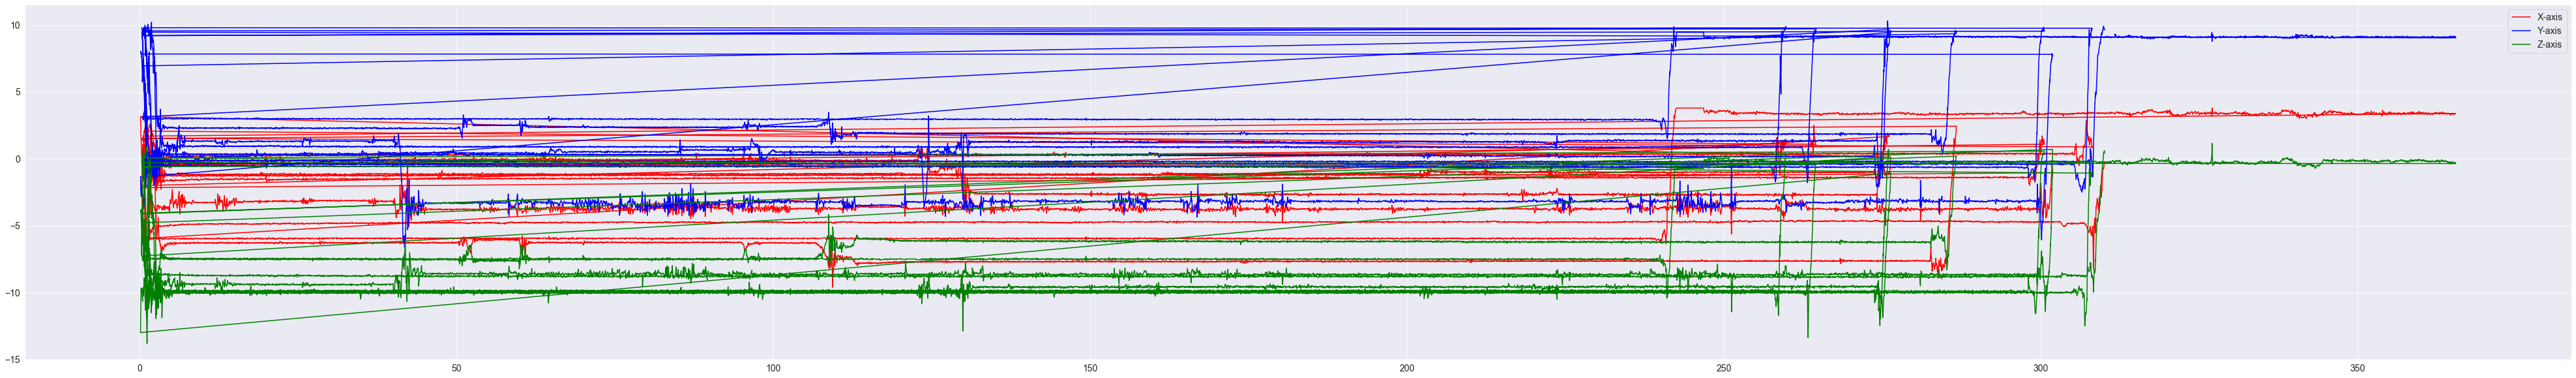

In [20]:
# phone_TYPE_ACCELEROMETER
acceleration_time = list(sitting["#->Timestamp"].values)
matplotlib.rcParams['figure.figsize'] = [70, 10]
# display(acceleration_data)
x_axis = acceleration_time
ACC_X = list(sitting["phone_TYPE_ACCELEROMETER-X"].values)
ACC_Y = list(sitting["phone_TYPE_ACCELEROMETER-Y"].values)
ACC_Z = list(sitting["phone_TYPE_ACCELEROMETER-Z"].values)
plt.plot(acceleration_time, ACC_X, 'r', label="X-axis")
plt.plot(acceleration_time, ACC_Y, 'b', label="Y-axis")
plt.plot(acceleration_time, ACC_Z, 'g', label="Z-axis")
plt.legend(loc="upper right")
plt.show()

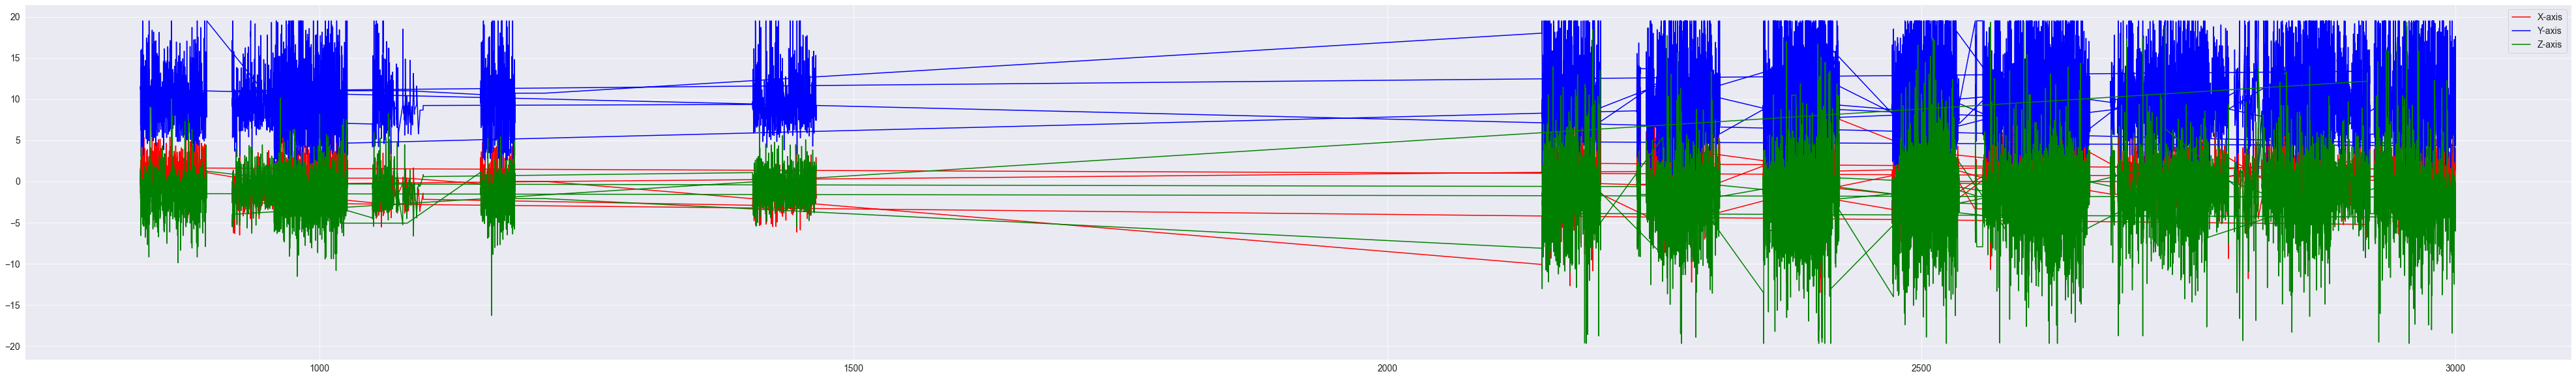

In [21]:
# phone_TYPE_ACCELEROMETER
acceleration_time = list(downstairs["#->Timestamp"].values)
matplotlib.rcParams['figure.figsize'] = [70, 10]
# display(acceleration_data)
x_axis = acceleration_time
ACC_X = list(downstairs["phone_TYPE_ACCELEROMETER-X"].values)
ACC_Y = list(downstairs["phone_TYPE_ACCELEROMETER-Y"].values)
ACC_Z = list(downstairs["phone_TYPE_ACCELEROMETER-Z"].values)
plt.plot(acceleration_time, ACC_X, 'r', label="X-axis")
plt.plot(acceleration_time, ACC_Y, 'b', label="Y-axis")
plt.plot(acceleration_time, ACC_Z, 'g', label="Z-axis")
plt.legend(loc="upper right")
plt.show()

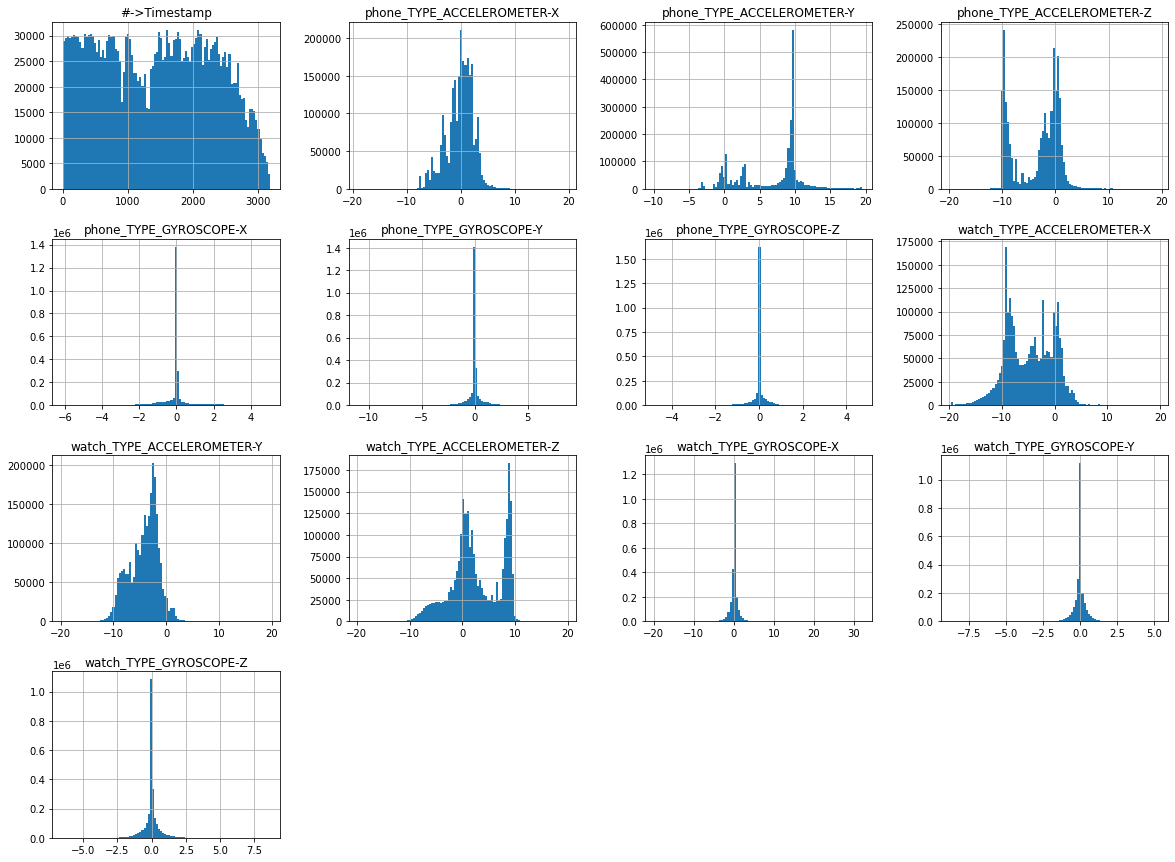

In [11]:
xss=All_datasets.hist(bins=100, figsize = (20,15))

In [12]:
Q1 = All_datasets.quantile(0.25)
Q3 = All_datasets.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
print((All_datasets < (Q1 - 1.5 * IQR)) |(All_datasets > (Q3 + 1.5 * IQR)) )
print(All_datasets.shape)

IQR is
 #->Timestamp                  1495.511000
phone_TYPE_ACCELEROMETER-X       3.004135
phone_TYPE_ACCELEROMETER-Y       6.995727
phone_TYPE_ACCELEROMETER-Z       8.758072
phone_TYPE_GYROSCOPE-X           0.028503
phone_TYPE_GYROSCOPE-Y           0.063065
phone_TYPE_GYROSCOPE-Z           0.018768
watch_TYPE_ACCELEROMETER-X       7.736245
watch_TYPE_ACCELEROMETER-Y       3.801100
watch_TYPE_ACCELEROMETER-Z       8.071354
watch_TYPE_GYROSCOPE-X           0.319605
watch_TYPE_GYROSCOPE-Y           0.173119
watch_TYPE_GYROSCOPE-Z           0.181109
dtype: float64


<ipython-input-12-0b4b016dfacc>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((All_datasets < (Q1 - 1.5 * IQR)) |(All_datasets > (Q3 + 1.5 * IQR)) )
<ipython-input-12-0b4b016dfacc>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((All_datasets < (Q1 - 1.5 * IQR)) |(All_datasets > (Q3 + 1.5 * IQR)) )


         #->Timestamp  label  phone_TYPE_ACCELEROMETER-X  \
0               False  False                       False   
1               False  False                       False   
2               False  False                       False   
3               False  False                       False   
4               False  False                       False   
...               ...    ...                         ...   
2458409         False  False                       False   
2458410         False  False                       False   
2458411         False  False                       False   
2458412         False  False                       False   
2458413         False  False                       False   

         phone_TYPE_ACCELEROMETER-Y  phone_TYPE_ACCELEROMETER-Z  \
0                             False                       False   
1                             False                       False   
2                             False                       False   
3          

In [14]:
df_out = All_datasets[~((All_datasets < (Q1 - 1.5 * IQR)) |(All_datasets > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out

<ipython-input-14-6686a9ffcce3>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = All_datasets[~((All_datasets < (Q1 - 1.5 * IQR)) |(All_datasets > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-14-6686a9ffcce3>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = All_datasets[~((All_datasets < (Q1 - 1.5 * IQR)) |(All_datasets > (Q3 + 1.5 * IQR))).any(axis=1)]


,#->Timestamp,label,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z
184,2.646,sitting,-1.292160,-0.270920,-9.996536,-0.028122,-0.032104,0.024170,-2.542046,-6.247401,7.291028,-0.005327,-0.234377,-0.170456
185,2.647,sitting,-1.292160,-0.270920,-9.996536,-0.028122,-0.032104,0.024170,-2.609068,-5.912291,7.128260,-0.005327,-0.234377,-0.170456
186,2.648,sitting,-1.292160,-0.270920,-9.996536,-0.028122,-0.032104,0.024170,-2.733537,-5.567607,7.042089,-0.005327,-0.234377,-0.170456
187,2.649,sitting,-1.352203,-0.252640,-10.030014,-0.028122,-0.032104,0.024170,-2.953752,-5.586756,6.879322,-0.005327,-0.234377,-0.170456
188,2.650,sitting,-1.352203,-0.252640,-10.030014,-0.028122,-0.032104,0.024170,-3.183541,-5.816546,6.927195,-0.005327,-0.234377,-0.170456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458350,3189.075,vacuum,-0.683121,9.667709,1.878067,0.027328,0.041626,0.010132,-9.225089,-0.416493,2.120765,-0.106535,-0.146485,-0.151812
2458351,3189.076,vacuum,-0.683121,9.667709,1.878067,0.027328,0.041626,0.010132,-9.196365,-0.330322,2.398427,-0.106535,-0.146485,-0.151812
2458352,3189.077,vacuum,-0.683121,9.667709,1.878067,0.027328,0.041626,0.010132,-8.966576,-1.000542,2.963326,-0.106535,-0.146485,-0.151812
2458353,3189.078,vacuum,-0.683121,9.667709,1.878067,0.027328,0.041626,0.010132,-8.535721,-1.373949,2.972901,-0.106535,-0.146485,-0.151812


array([[<AxesSubplot:title={'center':'#->Timestamp'}>,
        <AxesSubplot:title={'center':'phone_TYPE_ACCELEROMETER-X'}>,
        <AxesSubplot:title={'center':'phone_TYPE_ACCELEROMETER-Y'}>,
        <AxesSubplot:title={'center':'phone_TYPE_ACCELEROMETER-Z'}>],
       [<AxesSubplot:title={'center':'phone_TYPE_GYROSCOPE-X'}>,
        <AxesSubplot:title={'center':'phone_TYPE_GYROSCOPE-Y'}>,
        <AxesSubplot:title={'center':'phone_TYPE_GYROSCOPE-Z'}>,
        <AxesSubplot:title={'center':'watch_TYPE_ACCELEROMETER-X'}>],
       [<AxesSubplot:title={'center':'watch_TYPE_ACCELEROMETER-Y'}>,
        <AxesSubplot:title={'center':'watch_TYPE_ACCELEROMETER-Z'}>,
        <AxesSubplot:title={'center':'watch_TYPE_GYROSCOPE-X'}>,
        <AxesSubplot:title={'center':'watch_TYPE_GYROSCOPE-Y'}>],
       [<AxesSubplot:title={'center':'watch_TYPE_GYROSCOPE-Z'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

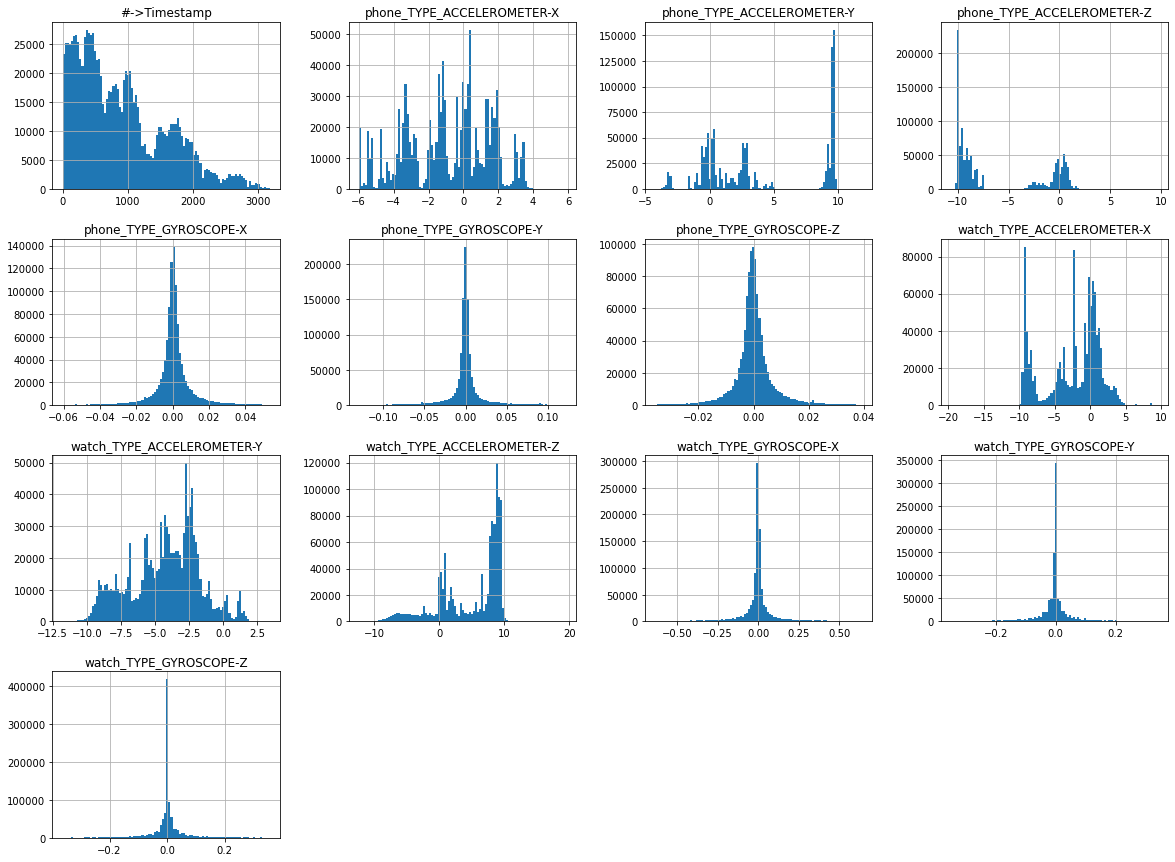

In [15]:
df_out.hist(bins=100, figsize = (20,15))

## Analyzing Gyroscope Signal

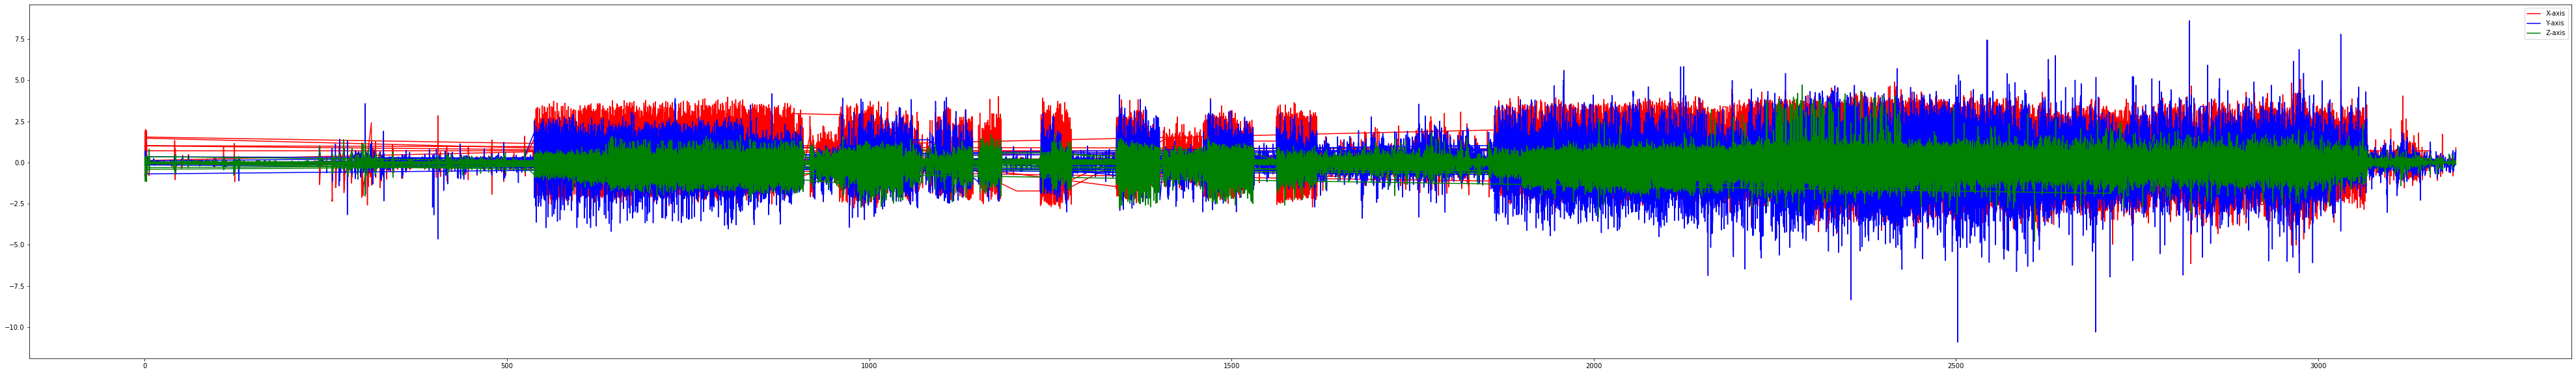

In [16]:
# phone_TYPE_GYROSCOPE
gyroscope_time = list(All_datasets["#->Timestamp"].values)
matplotlib.rcParams['figure.figsize'] = [70, 10]
x_axis = gyroscope_time
GYR_X = list(All_datasets["phone_TYPE_GYROSCOPE-X"].values)
GYR_Y = list(All_datasets["phone_TYPE_GYROSCOPE-Y"].values)
GYR_Z = list(All_datasets["phone_TYPE_GYROSCOPE-Z"].values)
plt.plot(gyroscope_time, GYR_X, 'r', label="X-axis")
plt.plot(gyroscope_time, GYR_Y, 'b', label="Y-axis")
plt.plot(gyroscope_time, GYR_Z, 'g', label="Z-axis")
plt.legend(loc="upper right")
plt.show()

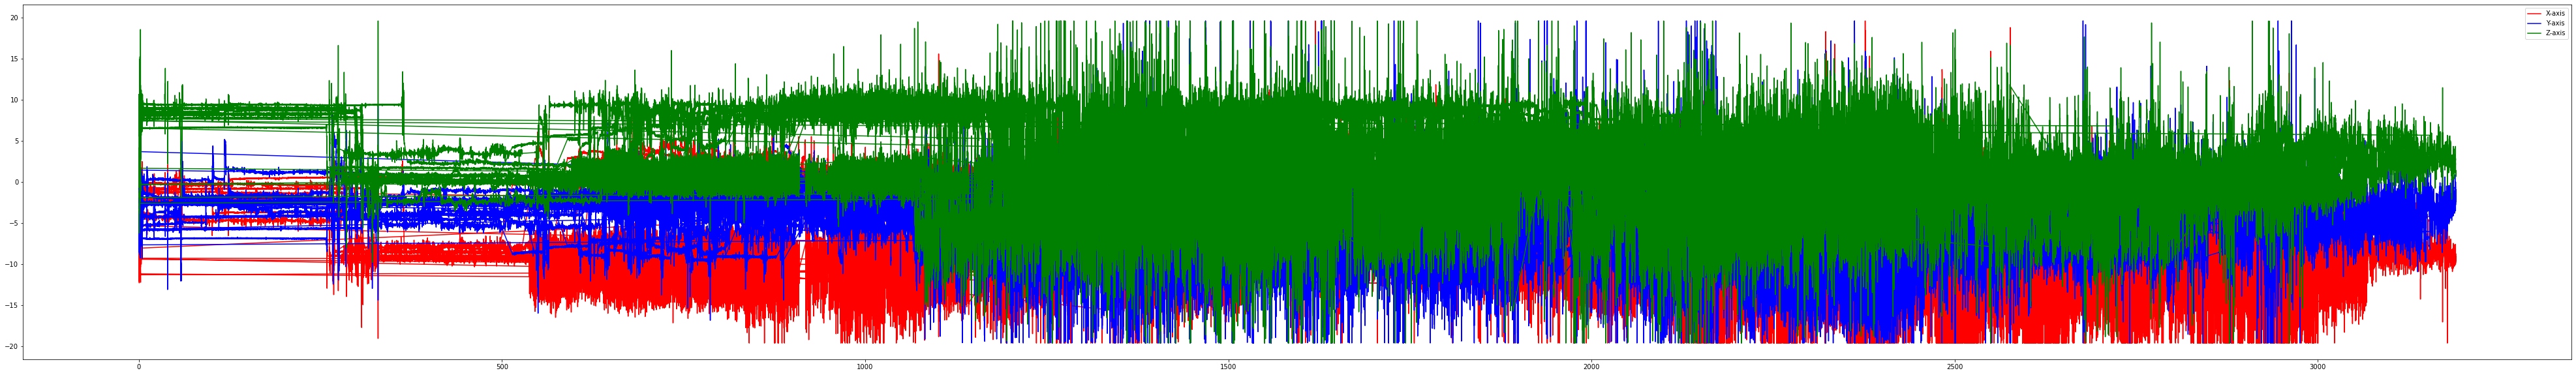

In [17]:
# watch_TYPE_ACCELEROMETER
acceleration_time = list(All_datasets["#->Timestamp"].values)
matplotlib.rcParams['figure.figsize'] = [70, 10]
x_axis = acceleration_time
ACC_X = list(All_datasets["watch_TYPE_ACCELEROMETER-X"].values)
ACC_Y = list(All_datasets["watch_TYPE_ACCELEROMETER-Y"].values)
ACC_Z = list(All_datasets["watch_TYPE_ACCELEROMETER-Z"].values)
plt.plot(acceleration_time, ACC_X, 'r', label="X-axis")
plt.plot(acceleration_time, ACC_Y, 'b', label="Y-axis")
plt.plot(acceleration_time, ACC_Z, 'g', label="Z-axis")
plt.legend(loc="upper right")
plt.show()

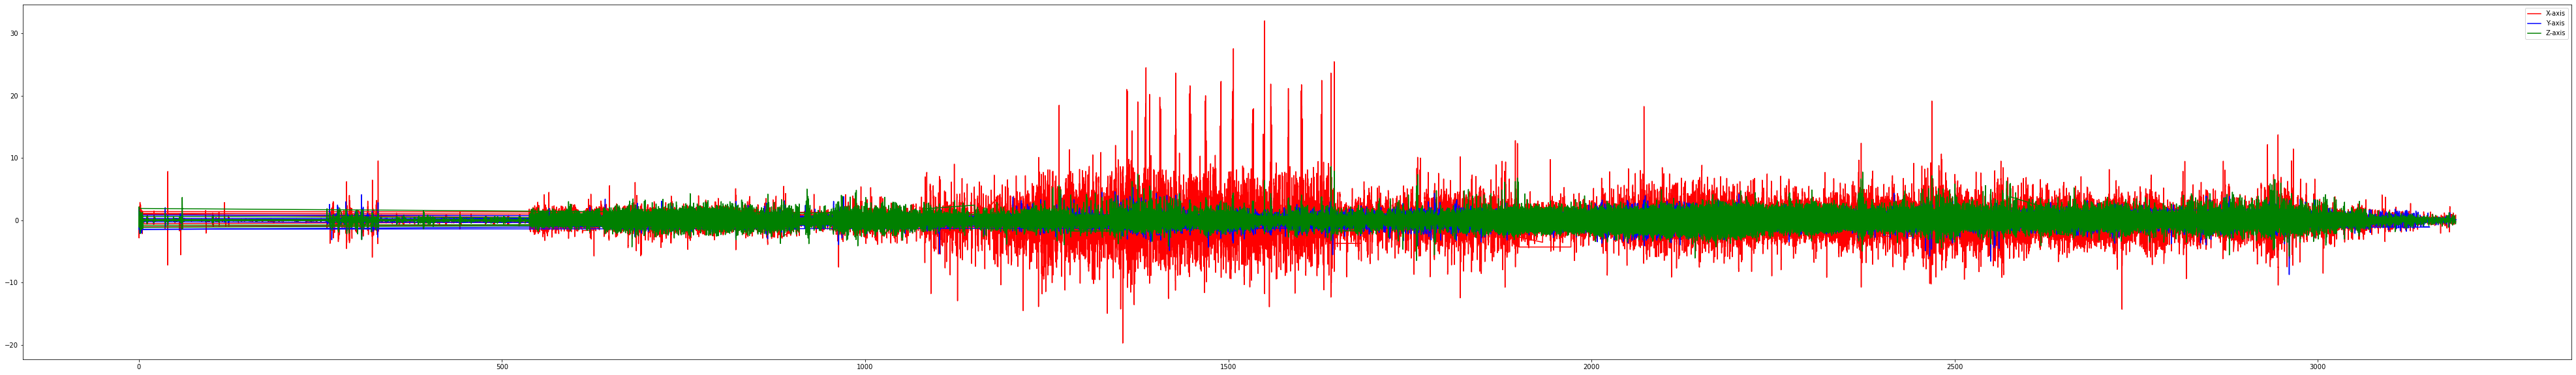

In [18]:
# watch_TYPE_GYROSCOPE
gyroscope_time = list(All_datasets["#->Timestamp"].values)
matplotlib.rcParams['figure.figsize'] = [70, 10]
x_axis = gyroscope_time
GYR_X = list(All_datasets["watch_TYPE_GYROSCOPE-X"].values)
GYR_Y = list(All_datasets["watch_TYPE_GYROSCOPE-Y"].values)
GYR_Z = list(All_datasets["watch_TYPE_GYROSCOPE-Z"].values)
plt.plot(gyroscope_time, GYR_X, 'r', label="X-axis")
plt.plot(gyroscope_time, GYR_Y, 'b', label="Y-axis")
plt.plot(gyroscope_time, GYR_Z, 'g', label="Z-axis")
plt.legend(loc="upper right")
plt.show()

In [19]:
# Sliding window (rolling) with a fixed window size of 2 seconds for 50Hz
window_size = 2*50

# Features: minimum (min), maximum (max), sum (sum), standard deviation (std), mean (mean)
X=All_datasets.iloc[:,1:]
features = X.rolling(window_size, center=True, min_periods=1).agg(['min', 'max', 'sum', 'mean', 'std'])
features.columns = ['-'.join(tup).rstrip('-') for tup in features.columns.values]
    # features.dropna(inplace=True)
features

,phone_TYPE_ACCELEROMETER-X-min,phone_TYPE_ACCELEROMETER-X-max,phone_TYPE_ACCELEROMETER-X-sum,phone_TYPE_ACCELEROMETER-X-mean,phone_TYPE_ACCELEROMETER-X-std,phone_TYPE_ACCELEROMETER-Y-min,phone_TYPE_ACCELEROMETER-Y-max,phone_TYPE_ACCELEROMETER-Y-sum,phone_TYPE_ACCELEROMETER-Y-mean,phone_TYPE_ACCELEROMETER-Y-std,...,watch_TYPE_GYROSCOPE-Y-min,watch_TYPE_GYROSCOPE-Y-max,watch_TYPE_GYROSCOPE-Y-sum,watch_TYPE_GYROSCOPE-Y-mean,watch_TYPE_GYROSCOPE-Y-std,watch_TYPE_GYROSCOPE-Z-min,watch_TYPE_GYROSCOPE-Z-max,watch_TYPE_GYROSCOPE-Z-sum,watch_TYPE_GYROSCOPE-Z-mean,watch_TYPE_GYROSCOPE-Z-std
0,-0.284668,1.718857,60.789352,1.215787,0.576176,7.679336,9.826767,480.167453,9.603349,0.344959,...,-0.03196,0.306288,1.190528,0.023811,0.090362,-0.039951,0.130505,3.731385,0.074628,0.061733
1,-0.284668,1.718857,61.710480,1.210009,0.571875,7.679336,9.826767,487.952212,9.567690,0.425987,...,-0.03196,0.306288,1.496815,0.029349,0.097809,-0.039951,0.130505,3.861890,0.075723,0.061611
2,-0.284668,1.718857,62.631607,1.204454,0.567656,7.679336,9.826767,495.736971,9.533403,0.488916,...,-0.03196,0.306288,1.803103,0.034675,0.104182,-0.039951,0.130505,3.992395,0.076777,0.061476
3,-0.284668,1.718857,63.552734,1.199108,0.563517,7.679336,9.826767,503.521731,9.500410,0.540495,...,-0.03196,0.306288,2.109391,0.039800,0.109714,-0.039951,0.130505,4.122901,0.077791,0.061327
4,-0.284668,1.718857,64.466492,1.193824,0.559525,7.679336,9.826767,511.473010,9.471722,0.575382,...,-0.03196,0.306288,2.415679,0.044735,0.114565,-0.039951,0.130505,4.253406,0.078767,0.061168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458409,-0.975815,0.472427,-17.556320,-0.319206,0.382126,9.436371,10.251099,539.123014,9.802237,0.241819,...,-0.02397,0.125179,3.877871,0.070507,0.054679,-0.596595,-0.274327,-25.155554,-0.457374,0.128366
2458410,-0.975815,0.472427,-17.141617,-0.317437,0.385487,9.436371,10.251099,529.686643,9.809012,0.238762,...,-0.02397,0.125179,3.872544,0.071714,0.054448,-0.596595,-0.274327,-24.641523,-0.456325,0.129333
2458411,-0.975815,0.472427,-16.726913,-0.315602,0.388938,9.436371,10.251099,520.250272,9.816043,0.235336,...,-0.02397,0.125179,3.867217,0.072966,0.054177,-0.596595,-0.274327,-24.127492,-0.455236,0.130321
2458412,-0.975815,0.472427,-16.312210,-0.313696,0.392482,9.539398,10.251099,510.813901,9.823344,0.231491,...,-0.02397,0.125179,3.861890,0.074267,0.053864,-0.596595,-0.274327,-23.613461,-0.454105,0.131330


In [ ]:
X = withoutTS.iloc[:, :-1].values
y = withoutTS.iloc[:, -1].values

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
withoutTS['encoded_label'] = encoder.fit_transform(withoutTS['label'])
withoutTS['encoded_label'].value_counts()

4    274514
0    271656
2    266336
5    264229
3    260001
9    255285
6    251790
8    242829
7    192910
1    178864
Name: encoded_label, dtype: int64

In [42]:
withoutTS['label'].value_counts()

sitting       274514
dishes        271656
hand_wash     266336
standing      264229
reading       260001
walking       255285
typing        251790
vacuum        242829
upstairs      192910
downstairs    178864
Name: label, dtype: int64

In [30]:
x = withoutTS.iloc[:, 1:].values
y = withoutTS.iloc[:, :1].values

In [43]:
withoutTS

,label,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z,encoded_label
0,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.896305,1.440971,-0.191763,-0.031960,0.106535,4
1,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.886730,1.421822,-0.191763,-0.031960,0.106535,4
2,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.004874,-2.953752,1.440971,-0.191763,-0.031960,0.106535,4
3,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.995299,-2.934603,1.498419,-0.191763,-0.031960,0.106535,4
4,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.985725,-2.905879,1.536717,-0.191763,-0.031960,0.106535,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458409,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.081471,-1.996296,1.383524,-0.167792,0.125179,-0.295634,8
2458410,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.225089,-1.785656,1.326077,-0.167792,0.125179,-0.295634,8
2458411,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.502751,-1.737783,1.402673,-0.167792,0.125179,-0.295634,8
2458412,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.560199,-1.785656,1.335651,-0.167792,0.125179,-0.295634,8


In [59]:
withoutTS.isna().sum()

label                          0
phone_TYPE_ACCELEROMETER-X     0
phone_TYPE_ACCELEROMETER-Y     0
phone_TYPE_ACCELEROMETER-Z     0
phone_TYPE_GYROSCOPE-X         3
phone_TYPE_GYROSCOPE-Y         3
phone_TYPE_GYROSCOPE-Z         3
watch_TYPE_ACCELEROMETER-X     0
watch_TYPE_ACCELEROMETER-Y     0
watch_TYPE_ACCELEROMETER-Z     0
watch_TYPE_GYROSCOPE-X        56
watch_TYPE_GYROSCOPE-Y        56
watch_TYPE_GYROSCOPE-Z        56
encoded_label                  0
dtype: int64

<AxesSubplot:xlabel='index'>

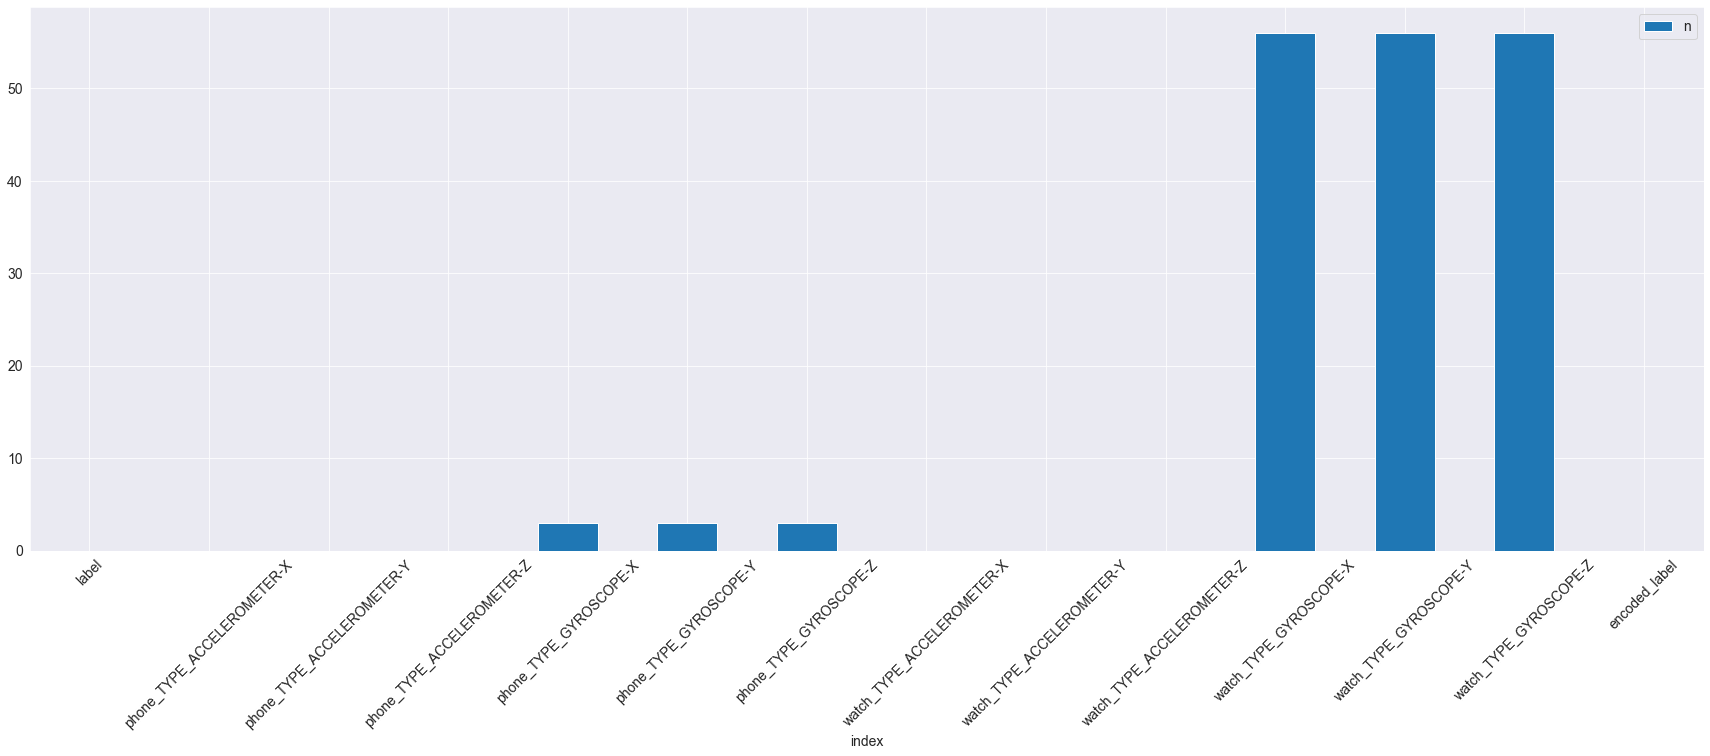

In [60]:
withoutTS.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [44]:
gg = withoutTS.copy()
gg = gg.drop('label', axis=1)

In [45]:
X = gg.iloc[:, :-1].values
y = gg.iloc[:, -1].values

In [46]:
x

array([[ 1.506607  ,  9.826767  ,  0.45610046, ..., -0.19176282,
        -0.03196047,  0.1065349 ],
       [ 1.506607  ,  9.826767  ,  0.45610046, ..., -0.19176282,
        -0.03196047,  0.1065349 ],
       [ 1.506607  ,  9.826767  ,  0.45610046, ..., -0.19176282,
        -0.03196047,  0.1065349 ],
       ...,
       [-0.3514862 , 10.073776  ,  0.20056152, ..., -0.16779247,
         0.12517852, -0.29563436],
       [-0.3514862 , 10.073776  ,  0.20056152, ..., -0.16779247,
         0.12517852, -0.29563436],
       [-0.3514862 , 10.073776  ,  0.20056152, ..., -0.17844597,
         0.11985177, -0.27432737]])

In [47]:
y

array([4, 4, 4, ..., 8, 8, 8])

In [61]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Imputer.fit(x)
x = Imputer.transform(x)

In [62]:
#splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=1000)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:] = sc.fit_transform(x_train[:])
x_test[:] = sc.transform(x_test[:])

In [70]:
x_train

array([[ 0.8005508 ,  0.58540632,  0.38327281, ..., -0.42487654,
        -1.29791668,  0.217277  ],
       [ 0.14658274,  0.4368895 ,  0.83132596, ...,  0.1063103 ,
        -0.70406978,  0.85744368],
       [ 1.27318688,  1.15868701, -0.20203083, ..., -0.09717919,
         1.75523105,  1.24813366],
       ...,
       [-1.18146335, -0.9002634 , -1.25800642, ..., -0.20553074,
         0.04469372,  0.07135666],
       [ 0.69367271,  0.69261311,  0.68316636, ...,  0.62956898,
         0.78700233,  0.29259074],
       [ 1.30100694,  0.57220996,  0.92964843, ..., -0.01525485,
        -0.02630971,  0.06664956]])

In [67]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [71]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 2]
 [1 6]
 [7 7]
 ...
 [9 8]
 [5 5]
 [4 4]]


In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[95671   219  6992     0     0   281     0     3  5462    38]
 [   28 24201   182     0     0    85     0 14096  9426 23638]
 [79708   204 18237  4039    60   992     0    13  2831   185]
 [   35   168  1267 96050  5265     0  1354     0    25     0]
 [ 4143   550   211 29278 73883    42   564   241   449   294]
 [ 1030  3106   108     0     0 98000     0    36  3590   182]
 [   18  1207   168 58075 16254     0 21806     0  2957     3]
 [   38  9499   148     0     0    97     0 31242  9736 26744]
 [17098   884  1498     0     0  4280     0   969 65876  6642]
 [  709  8072    66     0     0   154     1 21627 14389 56647]]


0.5914511992482961

In [73]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: X has 2 features, but StandardScaler is expecting 12 features as input.

In [68]:
print('GaussianNBModel Train Score is : ' , classifier.score(x_train, y_train))
print('GaussianNBModel Test Score is : ' , classifier.score(x_test, y_test))

GaussianNBModel Train Score is :  0.589605897570791
GaussianNBModel Test Score is :  0.5914511992482961


In [64]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 2]
 [1 6]
 [7 7]
 ...
 [9 8]
 [5 5]
 [4 4]]


In [ ]:
#----------------------------------------------------

#Applying GaussianNB Model

'''
#sklearn.naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09)
'''

GaussianNBModel = GaussianNB()
GaussianNBModel.fit(x_train, y_train)

#Calculating Details
print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(x_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(x_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = GaussianNBModel.predict(x_test)
y_pred_prob = GaussianNBModel.predict_proba(x_test)
print('Predicted Value for GaussianNBModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for GaussianNBModel is : ' , y_pred_prob[:10])

In [ ]:
# Normalization
# from sklearn.preprocessing import normalize
# X=FeaturesDF.iloc[:,[1,2,3,4,5,6,7,8,9,10]]  #independent variable X
# y=FeaturesDF.iloc[:,0] #dependent variable y
#
# X=normalize(X)
# norm_df = pd.DataFrame(X)
# norm_df